In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as ts
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.api import qqplot

In [2]:
import os
os.getcwd()

'C:\\Users\\Gabriel\\Desktop\\analise_de_dados\\Series Temporais'

In [3]:
data = pd.read_excel ('teste.xls')
data['Var1'] = data['Var1'].apply(lambda x: round(x, 4))
data.head()

,Var1
0,100.0194
1,103.9771
2,100.5608
3,99.4196
4,99.8989


In [4]:
data.tail()

,Var1
195,107.6050
196,104.4035
197,99.1337
198,109.2342
199,103.4172


In [5]:
print(type(data['Var1'][1]))

<class 'numpy.float64'>


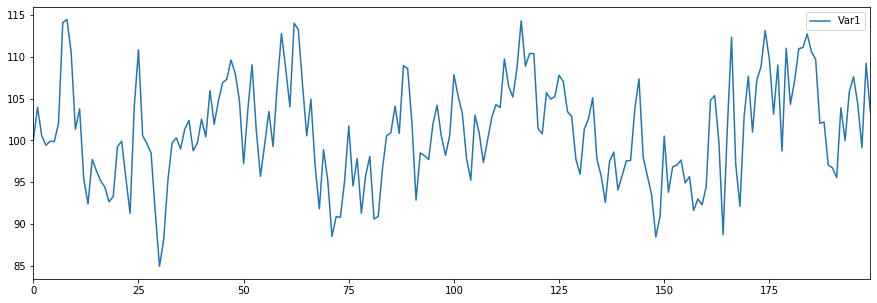

In [6]:
data.plot(figsize=(15,5))

In [7]:
ACF, q, pq = ts.acf(data['Var1'], qstat=True, fft = False)
PACF = ts.pacf(data['Var1'])

In [8]:
tabela = np.c_[range(1,41), ACF[1:], PACF[1:], q, pq]
tabela = pd.DataFrame(tabela, columns=['lag', "ACF", "PACF", "Q", "Prob(>Q)"])

In [9]:
tabela.head()

,lag,ACF,PACF,Q,Prob(>Q)
0,1.0,0.648355,0.651613,85.340220,2.512013e-20
1,2.0,0.396029,-0.042701,117.341655,3.308137e-26
2,3.0,0.360594,0.212614,144.007260,5.168184e-31
3,4.0,0.306134,-0.006104,163.324594,2.830236e-34
4,5.0,0.156588,-0.125287,168.404566,1.597629e-34


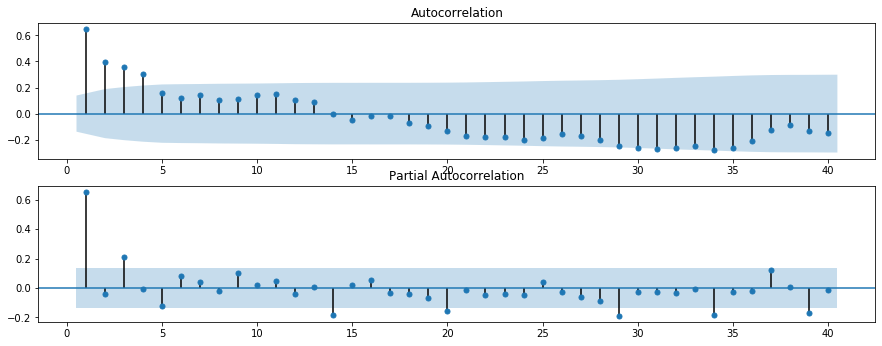

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,5.5))
fig = plot_acf(data['Var1'], lags=40, zero=False, ax=ax1)

fig = plot_pacf(data['Var1'], lags=40, zero=False, ax=ax2)


O metodo fit possui diversos parametros, dentre os quais o mais interessantes são 
<ul>
    <li>trend: Adiciona uma constante "c" ou não adiciona a constante "nc";</li>
    <li>method; If “css-mle”, the conditional sum of squares likelihood is maximized and its values are used as starting values for the computation of the exact likelihood via the Kalman filter. If “mle”, the exact likelihood is maximized via the Kalman Filter. If “css” the conditional sum of squares likelihood is maximized. O default é css-mle;</li>
    <li>solver; The default is ‘lbfgs’ (limited memory Broyden-Fletcher-Goldfarb-Shanno). Other choices are ‘bfgs’, ‘newton’ (Newton-Raphson), ‘nm’ (Nelder-Mead), ‘cg’ - (conjugate gradient), ‘ncg’ (non-conjugate gradient), and ‘powell’. O default é lbfgs.</li>
</ul>

In [11]:
modelo = sm.tsa.ARMA(data, (3,0))
modelo = modelo.fit(method = "css" )

In [12]:
modelo.params

const         101.148334
ar.L1.Var1      0.687378
ar.L2.Var1     -0.186963
ar.L3.Var1      0.211221
dtype: float64

In [13]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Var1   No. Observations:                  200
Model:                     ARMA(3, 0)   Log Likelihood                -579.917
Method:                           css   S.D. of innovations              4.594
Date:                Thu, 13 Feb 2020   AIC                           1169.833
Time:                        21:16:49   BIC                           1186.249
Sample:                             3   HQIC                          1176.479
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.1483      1.135     89.101      0.000      98.923     103.373
ar.L1.Var1     0.6874      0.070      9.861      0.000       0.551       0.824
ar.L2.Var1    -0.1870      0.085     -2.203      0.029      -0.353      -0.021
ar.L3.Var1     0.2112      0.070      3.003      0.003       0.073       0.349
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2667           -0.0000j            1.2667           -0.0000
AR.2           -0.1908           -1.9239j            1.9333           -0.2657
AR.3           -0.1908           +1.9239j            1.9333            0.2657
-----------------------------------------------------------------------------
"""

In [14]:
sm.stats.durbin_watson(modelo.resid.values)

1.9925767089946234

In [15]:
residuo = modelo.resid
residouquad = residuo**2
estimado = modelo.predict()
residuo = pd.DataFrame(residuo,  columns=['Residuos'])
residuo.head()

,Residuos
3,-0.557547
4,-0.768483
5,-0.616010
6,1.932825
7,12.337969


Definindo os eixos para fazer um grafico de linhas com residuos, valor estimado e valor observado.

In [16]:
dif = len(data) - len(estimado)
x1 = range(dif, len(data))
x2 = range(1, len(data)+1)

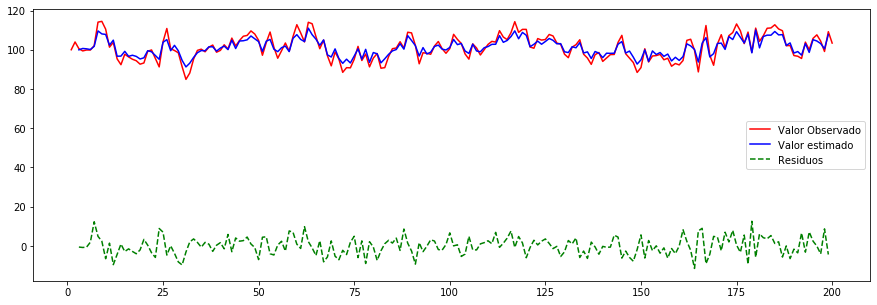

In [17]:
fig, axes  =  plt.subplots(figsize = (15, 5))

axes.plot(x2, data['Var1'], 'r', label = 'Valor Observado') 
axes.plot(x1, estimado, 'b',  label = 'Valor estimado')

axes.plot(x1, residuo, 'g--', label = 'Residuos')
axes.legend()

<b>O pvalor do teste de Ljung-Box esta diferente do Eviews pois no ultimo os gl da Chi são h-p-q, já no Statsmodels so considera h.</b>

In [18]:
ACF, q, pq = ts.acf(residuo, qstat=True, fft = False)
PACF = ts.pacf(residuo, method = 'ols')
tabela = np.c_[range(1,41), ACF[1:], PACF[1:], q, pq]
tabela = pd.DataFrame(tabela, columns=['lag', "ACF", "PACF", "Q", "Prob(Q>q)"])
tabela[0:10]

,lag,ACF,PACF,Q,Prob(Q>q)
0,1.0,0.001395,0.001399,0.000389,0.984256
1,2.0,0.025250,0.025837,0.128564,0.937740
2,3.0,-0.016447,-0.017434,0.183228,0.980250
3,4.0,0.068602,0.070351,1.139173,0.888008
4,5.0,-0.105414,-0.109447,3.408070,0.637341
5,6.0,-0.064725,-0.071492,4.267938,0.640467
6,7.0,0.048280,0.058036,4.748878,0.690577
7,8.0,-0.062366,-0.071178,5.555654,0.696867
8,9.0,0.029757,0.044818,5.740303,0.765602
9,10.0,0.013943,0.021388,5.781059,0.833310


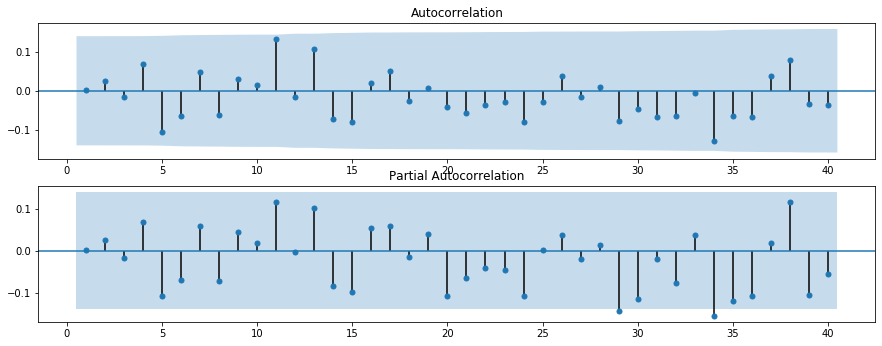

In [19]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,5.5))

fig = plot_acf(residuo, lags=40, zero=False, ax=ax1)
fig = plot_pacf(residuo, lags=40, zero=False, ax=ax2)

In [20]:
varerro = modelo.sigma2
residpad = residuo.values/np.sqrt(varerro)
residpad = pd.DataFrame(residpad,  columns=['Residuos Padronizados'])
n = len(residpad)
residpad.head()

,Residuos Padronizados
0,-0.121358
1,-0.167271
2,-0.134083
3,0.420707
4,2.685536


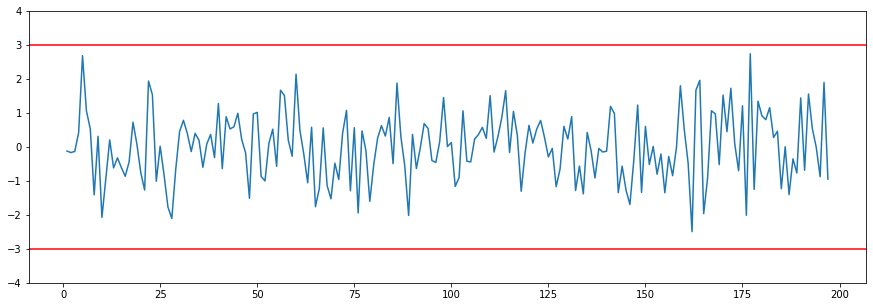

In [21]:
fig, axes = plt.subplots(figsize = (15, 5))
axes.plot(range(1, n + 1), residpad)
axes.set_ylim([-4, 4])
axes.axhline(y = 3, color = 'r')
axes.axhline(y = -3, color = 'r')

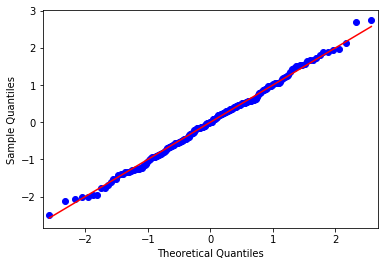

In [22]:
fig = sm.qqplot(residuo['Residuos'], scipy.stats.norm, fit=True, line='s')

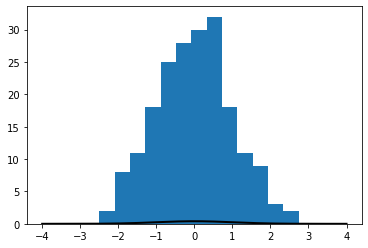

In [23]:
plt.hist(x = residpad['Residuos Padronizados'], bins = 'auto')
x = np.linspace(-4, 4, 1000)
p = scipy.stats.norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2)

In [24]:
stat1, p1 = scipy.stats.shapiro(residpad['Residuos Padronizados'])
print(f'Estatistica de teste: {stat1}; \nP-valor: {p1}')

Estatistica de teste: 0.9956443309783936; 
P-valor: 0.8464505672454834


In [25]:
stat2, p2 = scipy.stats.jarque_bera(residpad['Residuos Padronizados'])
print(f'Estatistica de teste: {stat2}; \nP-valor: {p2}')

Estatistica de teste: 0.6951639353637831; 
P-valor: 0.706394110068769


In [26]:
stat, valor_critico, alpha = scipy.stats.anderson(residpad['Residuos Padronizados'], dist = 'norm')
print(f'Estatistica de teste: {stat}; \nValor Critico: {valor_critico}')

Estatistica de teste: 0.18620954141300672; 
Valor Critico: [0.565 0.643 0.772 0.9   1.071]
